<a href="https://colab.research.google.com/github/CharlyAguirre/ADA-informes/blob/main/OrdenTopologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de orden topologico.

**Entrada**: Grafo dirigido sin ciclos **G=(V,E)**, siendo **V** la cantidad de nodos del grafo y **E** los arcos

**Salida:** Un orden topológico de los vértices de **G**. Es decir, una asignación **f(v)** a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v) < f(w)$.

Un orden topologico se trata del orden de los nodos que corresponden al grafo **G** tal que cada nodo este primero que sus decendientes, es decir que el primero en entrar al orden topologio es un nodo que no tenga padres/antecesor, por esta propiedad es que no se le puede encontrar un orden topologico a un grafo dirigido con ciclos ya que todos tienes un padre/antecesor

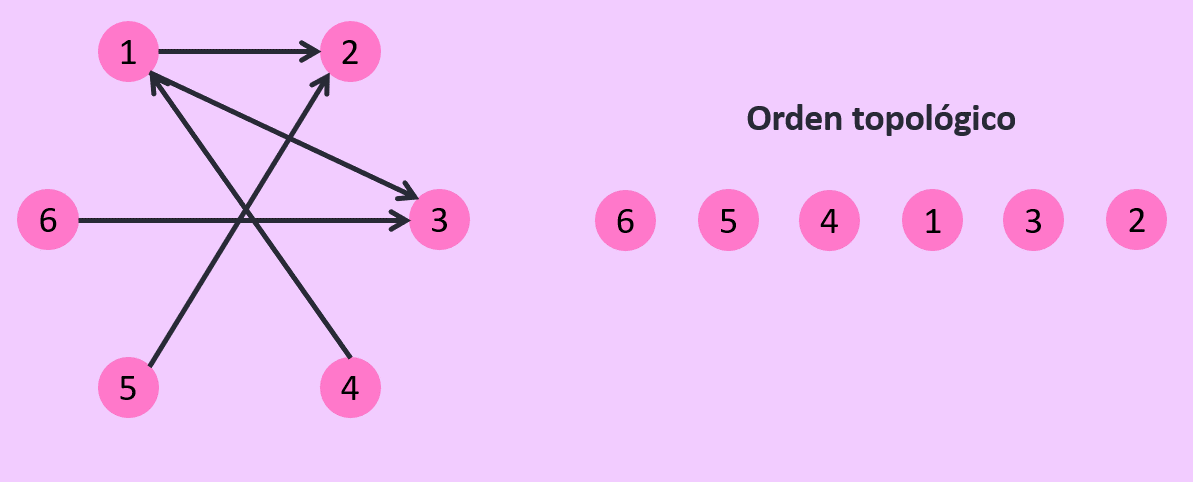

Las aplicaciones 

# 2. Ordenamiento topologico

## 2.1 Descripción ordenamiento topologico.

##2.2 Ejemplo paso a paso ordenamiento topologico.

Para el ejemplo paso a paso usaremos el grafo que se puede observar en la siguiente imagen.

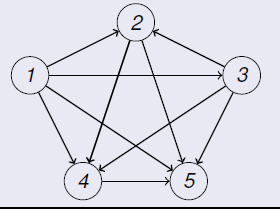

El primer paso es identificar un nodo el cual no posea padre/antercesor, en este grafo solo el nodo que cumple con esta condicion es el nodo 1 por lo que lo eliminamos y lo agregamos al orden topologico.

OrdenTopo = [1].

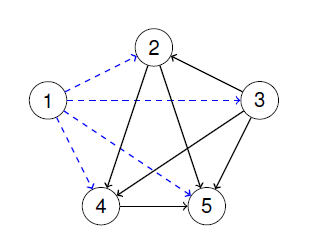

Siguendo con la propiedad de eliminar el nodo que no tenga padre/antecesor, al eliminar el nodo 1 nos queda el nodo 3 libre de padre/antecesor por lo que es el siguiente en eliminar y agregar al orden topologico.

OrdenTopo = [1,3].

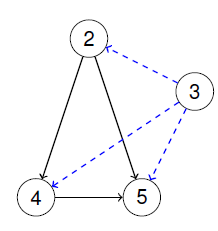

Siguendo con la propiedad de eliminar el nodo que no tenga padre/antecesor, al eliminar el nodo 3 nos queda el nodo 2 libre de padre/antecesor por lo que es el siguiente en eliminar y agregar al orden topologico.

OrdenTopo = [1,3,2].

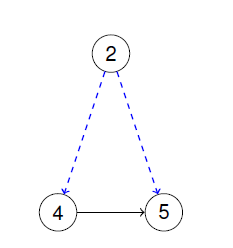

Siguendo con la propiedad de eliminar el nodo que no tenga padre/antecesor, al eliminar el nodo 2 nos queda el nodo 4 libre de padre/antecesor por lo que es el siguiente en eliminar y agregar al orden topologico.

OrdenTopo = [1,3,2,4].

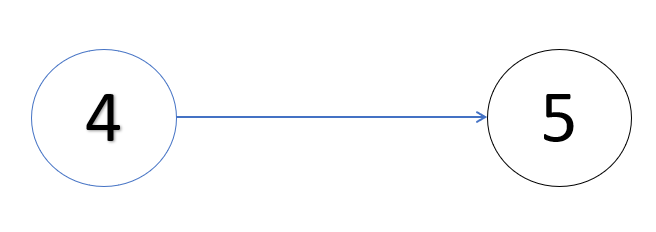

Por ultimo nos queda el nodos 5 libre por lo que lo agregamo al orden topologico, con esto ya terminamos con todos los nodos del grafo y obtenemos el orden topologico que se encuentra en el siguiente orden --> [1,3,2,4,5]

## 2.3 Código ordenamineto topologico.

In [101]:
#@title Generador de instancias, puede generar grafos con ciclos
from collections import defaultdict
import math
import random
import networkx as nx
import matplotlib.pyplot as plt

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph
 

###2.3.1 Variente iterativa

Grafo de entrada


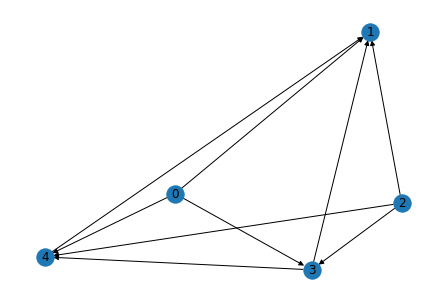

Orden Topologico salida:
[2, 0, 3, 4, 1]


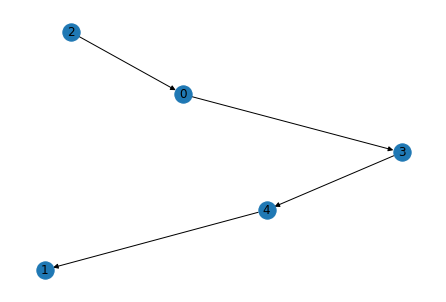

In [139]:
def ordenIterativoDFS(Grafo, verbose = False, visualize = False):

    state = dict() #estados del nodo
    OrdenSalida = []

    #mostrar grafo de entrada
    if visualize == True:
      print("Grafo de entrada")
      nx.draw(Grafo, with_labels=True)
      plt.show()
      plt.close()

    #iteraciones de los nodos del grafo    
    for n in Grafo:
      if verbose: print("Revisando nodo", n)
      S=[n] # se inicializa la pila con el nodod n

      while len(S)>0:
        n=S.pop()

        if verbose == True:
          print("Revisa se el nodo:",n)

        if n not in state: #primera pasada
          if verbose == True: 
            print("Nodo",n,"descubierto, agregando nodos adyacentes a stack")

          state[n]="descubierto"
          S.append(n)

          for adj in reversed(list(Grafo[n])):
              if adj not in state: 
                S.append(adj)
                    
        elif state[n]=="descubierto": #segunda pasada
            state[n] ="visitado"
                
            OrdenSalida.append(n)

            if verbose == True: 
              print("Nodo",n,"visitado y agregado a la lista") 
              print("Se actualiza la lista")
              print(OrdenSalida)
              print("")
            
        elif verbose == True:
          print("No se realiza nada")


    OrdenSalida.reverse()#por el orden que se van agregando quedan ordenados alrevez

    if verbose == True:
      print("Se da vuela el orde")
      print(OrdenSalida)

    #mostrar orden topo en grafo
    if visualize == True:
      print("Orden Topologico salida:")
      ordenTopo = nx.DiGraph()
      for i in range(len(OrdenSalida)-1):
          ordenTopo.add_edge(OrdenSalida[i], OrdenSalida[i+1])
      nx.draw(ordenTopo, with_labels=True)

    return OrdenSalida


Grafo = graph_to_nxdigraph(graph_instance_creator(5))

print(ordenIterativoDFS(Grafo, verbose = False, visualize = True))

###2.3.2 Variante recursiva.


Grafo de entrada


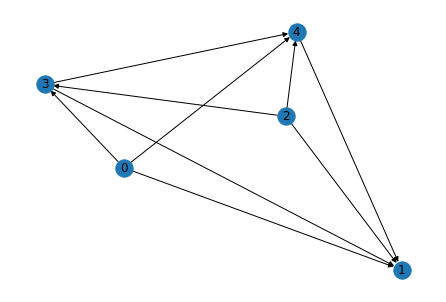

Orden Topologico salida:
[2, 0, 3, 4, 1]


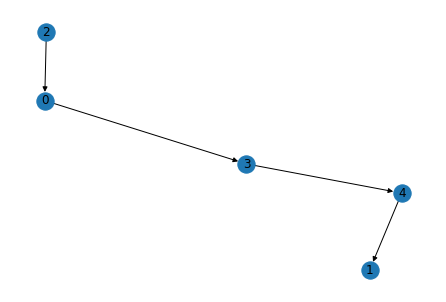

In [140]:
def dfsRecur(nodo,state,OrdenSalida,Grafo,verbose):

  #marca como visitado el nodo 
  state[nodo] = "descubierto"                                                      
                                                                                
  if verbose ==  True:
    print("El nodo",nodo," con los arcos ",list(Grafo.successors(nodo)),"se marca como visitado")


  #se visitan los nodos que estan conectados con el nodo ingresado a la funcion
  for i in list(Grafo.successors(nodo)):                                                                   
    if state[i] == "no descubierto":

      if verbose == True:
        print("Llamamos recursivamente a la funcion dfsRecur para revisar el nodo:", i)

      dfsRecur(i, state, OrdenSalida, Grafo,verbose)


  OrdenSalida.append(nodo)

  if verbose == True:
    print("Se ingresa el nodo",nodo," al stack")
    print(OrdenSalida)
    print("")

def ordenRecursivoDFS(Grafo,verbose = False, visualize = False):
                                                                     
  state = dict() #estados del nodo
  OrdenSalida = [] #orden topologico salida

  if visualize == True:
      print("Grafo de entrada")
      nx.draw(Grafo, with_labels=True)
      plt.show()
      plt.close()                                                                

  #se inicializa cada nodo como no descubierto
  for i in Grafo:
    state[i] = "no descubierto" 

  if verbose == True:
    print("Lista de estados de los nodos")
    print(state)                                             

  #llamada a la funcion dfsRecur
  for i in Grafo:
    if state[i] == "no descubierto":
      dfsRecur(i,state,OrdenSalida,Grafo,verbose)
                                                                           
  OrdenSalida.reverse()#por el orden que se van agregando quedan ordenados alrevez
  if visualize == True:
      print("Orden Topologico salida:")
      ordenTopo = nx.DiGraph()
      for i in range(len(OrdenSalida)-1):
          ordenTopo.add_edge(OrdenSalida[i], OrdenSalida[i+1])
      nx.draw(ordenTopo, with_labels=True)

                                                                
  return OrdenSalida

print(ordenRecursivoDFS(Grafo, verbose = False, visualize = True))                                           


##2.4 Ejecución paso a paso del ordenamiento topologico (verbose = True).

###2.4.1 Orden topologico iterativo.

Grafo de entrada


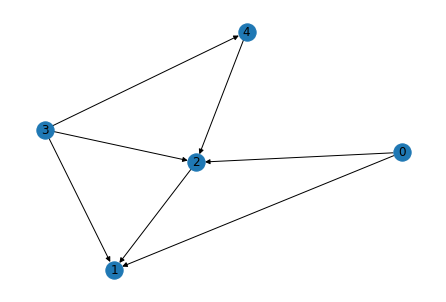

Revisando nodo 3
Revisa se el nodo: 3
Nodo 3 descubierto, agregando nodos adyacentes a stack
Revisa se el nodo: 4
Nodo 4 descubierto, agregando nodos adyacentes a stack
Revisa se el nodo: 2
Nodo 2 descubierto, agregando nodos adyacentes a stack
Revisa se el nodo: 1
Nodo 1 descubierto, agregando nodos adyacentes a stack
Revisa se el nodo: 1
Nodo 1 visitado y agregado a la lista
Se actualiza la lista
[1]

Revisa se el nodo: 2
Nodo 2 visitado y agregado a la lista
Se actualiza la lista
[1, 2]

Revisa se el nodo: 4
Nodo 4 visitado y agregado a la lista
Se actualiza la lista
[1, 2, 4]

Revisa se el nodo: 2
No se realiza nada
Revisa se el nodo: 1
No se realiza nada
Revisa se el nodo: 3
Nodo 3 visitado y agregado a la lista
Se actualiza la lista
[1, 2, 4, 3]

Revisando nodo 4
Revisa se el nodo: 4
No se realiza nada
Revisando nodo 2
Revisa se el nodo: 2
No se realiza nada
Revisando nodo 1
Revisa se el nodo: 1
No se realiza nada
Revisando nodo 0
Revisa se el nodo: 0
Nodo 0 descubierto, agregand

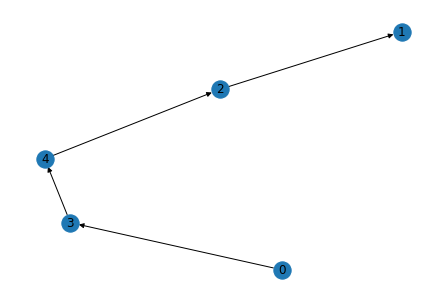

In [123]:
Grafo = graph_to_nxdigraph(graph_instance_creator(5))

print(ordenIterativoDFS(Grafo, verbose = True, visualize = True))

###2.4.2 Orden topologico recursivo.

Grafo de entrada


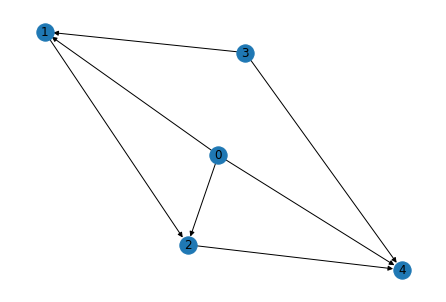

Lista de estados de los nodos
{3: 'no descubierto', 4: 'no descubierto', 1: 'no descubierto', 0: 'no descubierto', 2: 'no descubierto'}
El nodo 3  con los arcos  [4, 1] se marca como visitado
Llamamos recursivamente a la funcion dfsRecur para revisar el nodo: 4
El nodo 4  con los arcos  [] se marca como visitado
Se ingresa el nodo 4  al stack
[4]

Llamamos recursivamente a la funcion dfsRecur para revisar el nodo: 1
El nodo 1  con los arcos  [2] se marca como visitado
Llamamos recursivamente a la funcion dfsRecur para revisar el nodo: 2
El nodo 2  con los arcos  [4] se marca como visitado
Se ingresa el nodo 2  al stack
[4, 2]

Se ingresa el nodo 1  al stack
[4, 2, 1]

Se ingresa el nodo 3  al stack
[4, 2, 1, 3]

El nodo 0  con los arcos  [4, 2, 1] se marca como visitado
Se ingresa el nodo 0  al stack
[4, 2, 1, 3, 0]

Orden Topologico salida:
[0, 3, 1, 2, 4]


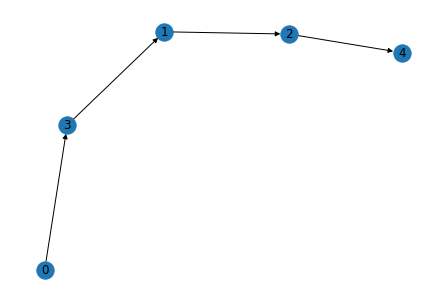

In [130]:
Grafo = graph_to_nxdigraph(graph_instance_creator(5))

print(ordenRecursivoDFS(Grafo, verbose = True, visualize = True))

# 3. Tiempo de ejecución. 

## 3.1 Teorema tiempo de ejecución ordenTopologico.

El tiempo de ejecución de manera teórica tiene el algoritmo que encuentra un orden topologico de un **grafos con N nodos y E arcos** entre estos nodos en notación **O es de O(N + E)** para todos sus casos.

##3.2 Comprobación del teorema anterior.

El teorema anterior se puede comprovar de la siguiente manera:

El algoritmo tiene un ciclo el cual va desde 0 hasta el numero de nodos pertenecientes al grafo ingresado por lo que nos deja la complejidad **O(N)**, tambien para cada nodo el algoritmo recorre solo una vez los arcos que este posee por lo que nos deja una complediad **O(E)** 

Si juntamos la primera complejidad optenida junto con la segunda nos queda que el tiempo de ejecucion del algoritmo es **O(N + E)** por lo que el teorema propuesto anteriormente es correcto.

# 4. Correctitud del ordenamiento topologico.

# 5. Experimentos

## 5.1

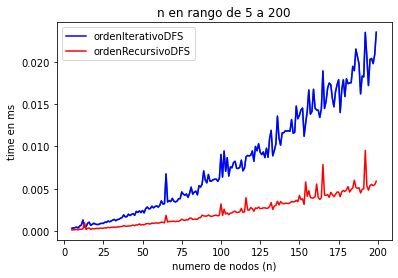

In [143]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y = []
y2 = []

for n in range(5, 200):

  GrafoExperimentos = graph_to_nxdigraph(graph_instance_creator(n))

  t1 = repeat(setup="from __main__ import ordenIterativoDFS", stmt=lambda: ordenIterativoDFS(GrafoExperimentos), repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import ordenRecursivoDFS", stmt=lambda: ordenRecursivoDFS(GrafoExperimentos), repeat = 1, number = 10)

  x.append(n)
  y.append(t1)
  y2.append(t2)

plt.plot(x,y)


plt.plot(x, y, "-b", label="ordenIterativoDFS")
plt.plot(x, y2, "-r", label="ordenRecursivoDFS")

plt.legend(loc="upper left")
plt.title("n en rango de 5 a 200")

plt.xlabel('numero de nodos (n)')
plt.ylabel('time en ms')
plt.show()